In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import matplotlib
matplotlib.rc('font', family='Malgun Gothic')

In [2]:
from sklearn.preprocessing import robust_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
import os
from os import listdir
from os.path import isfile, join

print([f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f))])

['data_set_test.xlsx', 'data_set_train.xlsx', 'regression_code.ipynb']


In [45]:
df_train = pd.read_excel('./data_set_train.xlsx')
df_train.head()

,aptnm(아파트 이름),yyyyqrt(거래년도 분기별),price(가격),con_year(건축년도),dong(동),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,...,dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),parking_per(세대별 주차장수),Heater(난방 시스템),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
0,강남역우정에쉐르,2006Q1,9000,2004,역삼동,17.23,7,37.494204,127.043545,225613,...,849.353653,0,52,1,0.75,개별난방,536.0,58.0,13,12
1,강남역우정에쉐르,2006Q1,9000,2004,역삼동,17.23,7,37.494204,127.043545,225613,...,849.353653,0,52,1,0.75,개별난방,536.0,58.0,13,12
2,개포주공1단지,2006Q1,73000,1982,개포동,50.38,3,37.478407,127.061375,225613,...,1486.178329,0,5040,124,0.49,개별난방,72.0,15.0,5,5
3,개포주공1단지,2006Q1,70000,1982,개포동,50.64,5,37.484609,127.067275,225613,...,1160.598717,0,5040,124,0.49,개별난방,72.0,15.0,5,5
4,개포주공1단지,2006Q1,40000,1982,개포동,35.44,4,37.482445,127.051278,225613,...,650.325555,0,5040,124,0.49,개별난방,72.0,15.0,5,5


In [5]:
df_test = pd.read_excel('./data_set_test.xlsx')
df_test.head()

,aptnm(아파트 이름),yyyyqrt(거래년도 분기별),price(가격),con_year(건축년도),dong(동),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,...,dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),parking_per(세대별 주차장수),Heater(난방 시스템),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
0,강남역우정에쉐르,2017Q4,NaN,2004,역삼동,17.23,12,37.491379,127.034880,446228,...,812.764336,0,52,1,0.75,개별난방,536.0,58.0,13,12
1,강변상지리츠빌,2017Q4,NaN,2001,청담동,171.79,9,37.521477,127.045412,446228,...,598.704494,0,12,1,2.33,개별난방,397.0,57.0,13,13
2,개나리래미안,2017Q4,NaN,2006,역삼동,84.93,2,37.502200,127.043741,446228,...,526.308026,8,438,7,1.79,지역난방,273.0,21.0,22,11
3,개나리래미안,2017Q4,NaN,2006,역삼동,144.98,8,37.484510,127.054289,446228,...,712.971205,8,438,7,1.79,지역난방,273.0,21.0,22,11
4,개나리래미안,2017Q4,NaN,2006,역삼동,129.80,8,37.498740,127.049812,446228,...,646.209957,8,438,7,1.79,지역난방,273.0,21.0,22,11


## Train Data Preprocessing

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   aptnm(아파트 이름)              17400 non-null  object 
 1   yyyyqrt(거래년도 분기별)          17400 non-null  object 
 2   price(가격)                  17400 non-null  int64  
 3   con_year(건축년도)             17400 non-null  int64  
 4   dong(동)                    17400 non-null  object 
 5   area(면적)                   17400 non-null  float64
 6   floor(층수)                  17400 non-null  int64  
 7   Latitude(위도)               17400 non-null  float64
 8   Longtitude(경도)             17400 non-null  float64
 9   gdp                        17400 non-null  int64  
 10  e_grwth(경제성장률)             17400 non-null  float64
 11  Seoul_l.rate(지가상승률)        17400 non-null  float64
 12  house_rate(담보대출금리)         17400 non-null  float64
 13  dis_park(국립 공원과의 거리)       17400 non-null  flo

In [47]:
df_train.isnull().sum()

aptnm(아파트 이름)                   0
yyyyqrt(거래년도 분기별)               0
price(가격)                       0
con_year(건축년도)                  0
dong(동)                         0
area(면적)                        0
floor(층수)                       0
Latitude(위도)                    0
Longtitude(경도)                  0
gdp                             0
e_grwth(경제성장률)                  0
Seoul_l.rate(지가상승률)             0
house_rate(담보대출금리)              0
dis_park(국립 공원과의 거리)            0
dis_highschool(고등학교와의 거리)       0
dis_reconst(재개발 지역과의 거리)        0
dis_univ(대학과의 거리)               0
dis_hospital(종합 병원과의 거리)        0
dis_museum(국립 박물관과의 거리)         0
dis_subway(지하철역과의 거리)           0
brand_r(유명 아파트 브랜드순)            0
n_home(세대수)                     0
n_dong(동수)                      0
parking_per(세대별 주차장수)           0
Heater(난방 시스템)                  0
Yongpae(용적률)                 1263
Gunpae(건폐율)                  1629
Highest(최고층)                    0
Lowest(최저층)                     0
dtype: int64

In [48]:
# check nan values
df_train_yongpae = df_train[df_train['Yongpae(용적률)'].apply(np.isnan)]
df_train_yongpae.isnull().sum()

aptnm(아파트 이름)                   0
yyyyqrt(거래년도 분기별)               0
price(가격)                       0
con_year(건축년도)                  0
dong(동)                         0
area(면적)                        0
floor(층수)                       0
Latitude(위도)                    0
Longtitude(경도)                  0
gdp                             0
e_grwth(경제성장률)                  0
Seoul_l.rate(지가상승률)             0
house_rate(담보대출금리)              0
dis_park(국립 공원과의 거리)            0
dis_highschool(고등학교와의 거리)       0
dis_reconst(재개발 지역과의 거리)        0
dis_univ(대학과의 거리)               0
dis_hospital(종합 병원과의 거리)        0
dis_museum(국립 박물관과의 거리)         0
dis_subway(지하철역과의 거리)           0
brand_r(유명 아파트 브랜드순)            0
n_home(세대수)                     0
n_dong(동수)                      0
parking_per(세대별 주차장수)           0
Heater(난방 시스템)                  0
Yongpae(용적률)                 1263
Gunpae(건폐율)                  1263
Highest(최고층)                    0
Lowest(최저층)                     0
dtype: int64

In [49]:
# check nan values
df_train_gunpae = df_train[df_train['Gunpae(건폐율)'].apply(np.isnan)]
df_train_gunpae.isnull().sum()

aptnm(아파트 이름)                   0
yyyyqrt(거래년도 분기별)               0
price(가격)                       0
con_year(건축년도)                  0
dong(동)                         0
area(면적)                        0
floor(층수)                       0
Latitude(위도)                    0
Longtitude(경도)                  0
gdp                             0
e_grwth(경제성장률)                  0
Seoul_l.rate(지가상승률)             0
house_rate(담보대출금리)              0
dis_park(국립 공원과의 거리)            0
dis_highschool(고등학교와의 거리)       0
dis_reconst(재개발 지역과의 거리)        0
dis_univ(대학과의 거리)               0
dis_hospital(종합 병원과의 거리)        0
dis_museum(국립 박물관과의 거리)         0
dis_subway(지하철역과의 거리)           0
brand_r(유명 아파트 브랜드순)            0
n_home(세대수)                     0
n_dong(동수)                      0
parking_per(세대별 주차장수)           0
Heater(난방 시스템)                  0
Yongpae(용적률)                 1263
Gunpae(건폐율)                  1629
Highest(최고층)                    0
Lowest(최저층)                     0
dtype: int64

In [50]:
# 용적률, 건폐율 평균값 구하기
aptnm_lst = df_train_gunpae['aptnm(아파트 이름)'].unique()
print(aptnm_lst)

['개포주공6단지' '개포주공7단지' '상지리츠빌' '삼익' '신동아' '현대한강' '현대2차' '도곡현대힐스테이트' '하이캐슬'
 '삼호' '강남데시앙포레']


In [51]:
df_train.loc[df_train['aptnm(아파트 이름)'] == '개포주공6단지', :].describe()

,price(가격),con_year(건축년도),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,e_grwth(경제성장률),Seoul_l.rate(지가상승률),house_rate(담보대출금리),...,dis_hospital(종합 병원과의 거리),dis_museum(국립 박물관과의 거리),dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
count,531.000000,531.0,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,...,531.000000,531.000000,531.000000,531.0,531.0,531.0,0.0,0.0,531.0,531.0
mean,80364.406780,1983.0,66.307024,7.596987,37.485262,127.066247,338006.777778,3.367232,0.057390,5.996358,...,1622.606563,854.414146,1005.526064,0.0,1060.0,9.0,NaN,NaN,15.0,13.0
std,20197.766656,0.0,11.406917,4.106083,0.007240,0.007551,64362.276179,1.800120,0.373502,0.610060,...,334.379983,350.110401,405.111404,0.0,0.0,0.0,NaN,NaN,0.0,0.0
min,20000.000000,1983.0,53.060000,1.000000,37.474120,127.040646,225613.000000,-1.900000,-2.642750,5.263300,...,397.497317,277.183476,261.551658,0.0,1060.0,9.0,NaN,NaN,15.0,13.0
25%,65200.000000,1983.0,53.060000,4.000000,37.478407,127.061375,280088.000000,2.600000,0.001632,5.436579,...,1356.745357,569.829089,839.127689,0.0,1060.0,9.0,NaN,NaN,15.0,13.0
50%,78000.000000,1983.0,60.130000,7.000000,37.484335,127.068639,347443.000000,3.200000,0.016822,5.883320,...,1567.695451,1005.793754,1155.513971,0.0,1060.0,9.0,NaN,NaN,15.0,13.0
75%,92650.000000,1983.0,73.020000,11.000000,37.487684,127.071517,389173.000000,4.800000,0.099044,6.553271,...,2015.450648,1132.553129,1379.290407,0.0,1060.0,9.0,NaN,NaN,15.0,13.0
max,145000.000000,1983.0,83.210000,15.000000,37.523726,127.076623,446835.000000,7.400000,0.624673,7.415442,...,2178.849283,1759.417567,1567.920703,0.0,1060.0,9.0,NaN,NaN,15.0,13.0


In [52]:
df_train.loc[df_train['aptnm(아파트 이름)'] == '개포주공7단지', :].describe()

,price(가격),con_year(건축년도),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,e_grwth(경제성장률),Seoul_l.rate(지가상승률),house_rate(담보대출금리),...,dis_hospital(종합 병원과의 거리),dis_museum(국립 박물관과의 거리),dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
count,475.000000,475.0,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,...,475.000000,475.000000,475.000000,475.0,475.0,475.0,0.0,0.0,475.0,475.0
mean,79352.736842,1983.0,66.448547,8.237895,37.484515,127.065101,320291.414737,3.440000,0.053798,6.001124,...,1615.477777,841.950573,1019.814722,0.0,900.0,8.0,NaN,NaN,15.0,15.0
std,19574.263707,0.0,11.069064,4.301927,0.006317,0.007661,67268.536415,2.238906,0.454891,0.616483,...,310.936909,404.395912,362.532727,0.0,0.0,0.0,NaN,NaN,0.0,0.0
min,43900.000000,1983.0,53.460000,1.000000,37.472720,127.047927,225613.000000,-1.900000,-2.642750,5.263300,...,222.589543,277.183476,316.902800,0.0,900.0,8.0,NaN,NaN,15.0,15.0
25%,64000.000000,1983.0,53.460000,4.000000,37.478407,127.060503,256382.000000,2.600000,0.001632,5.486247,...,1459.461217,522.121849,894.667069,0.0,900.0,8.0,NaN,NaN,15.0,15.0
50%,78000.000000,1983.0,60.760000,8.000000,37.484335,127.067275,327407.000000,3.400000,0.016252,5.846402,...,1567.695451,915.531871,1155.513971,0.0,900.0,8.0,NaN,NaN,15.0,15.0
75%,92000.000000,1983.0,73.260000,12.000000,37.487610,127.071381,376447.000000,4.800000,0.152881,6.482908,...,1750.103683,1132.553129,1167.152014,0.0,900.0,8.0,NaN,NaN,15.0,15.0
max,135500.000000,1983.0,83.700000,15.000000,37.527728,127.076623,446835.000000,7.400000,0.624673,7.415442,...,2293.489022,1964.922606,1662.481871,0.0,900.0,8.0,NaN,NaN,15.0,15.0


In [53]:
df_train.loc[df_train['aptnm(아파트 이름)'] == '개포주공5단지', :].describe()

,price(가격),con_year(건축년도),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,e_grwth(경제성장률),Seoul_l.rate(지가상승률),house_rate(담보대출금리),...,dis_hospital(종합 병원과의 거리),dis_museum(국립 박물관과의 거리),dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
count,441.000000,441.0,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,...,441.000000,441.000000,441.000000,441.0,441.0,441.0,441.0,441.0,441.0,441.0
mean,82060.770975,1983.0,66.485283,7.693878,37.484935,127.065443,330670.714286,3.380499,0.035721,5.983073,...,1620.095568,857.900564,1008.169443,0.0,940.0,6.0,151.0,12.0,14.0,13.0
std,20882.428256,0.0,10.906124,3.867602,0.006944,0.007496,66444.032269,2.096129,0.464073,0.613247,...,335.525898,367.062688,399.590836,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,7000.000000,1983.0,53.980000,1.000000,37.472720,127.050367,225613.000000,-1.900000,-2.642750,5.263300,...,380.837660,277.183476,316.902800,0.0,940.0,6.0,151.0,12.0,14.0,13.0
25%,65500.000000,1983.0,53.980000,4.000000,37.478407,127.061375,263587.000000,2.600000,0.008581,5.478944,...,1306.687697,569.829089,712.971205,0.0,940.0,6.0,151.0,12.0,14.0,13.0
50%,79000.000000,1983.0,61.190000,8.000000,37.484335,127.067275,337411.000000,3.200000,0.016538,5.846402,...,1567.695451,1005.793754,1155.513971,0.0,940.0,6.0,151.0,12.0,14.0,13.0
75%,95000.000000,1983.0,74.250000,11.000000,37.487684,127.071517,389173.000000,4.800000,0.099044,6.378976,...,2015.450648,1132.553129,1379.290407,0.0,940.0,6.0,151.0,12.0,14.0,13.0
max,145000.000000,1983.0,83.170000,14.000000,37.527422,127.076623,446835.000000,7.400000,0.624673,7.415442,...,2293.489022,1964.922606,1662.481871,0.0,940.0,6.0,151.0,12.0,14.0,13.0


In [54]:
# 개포주공5단지 용적률 (151.0), 건폐율(12.0) 평균값으로 대체
df_train.loc[df_train['aptnm(아파트 이름)'] == '개포주공6단지', ['Yongpae(용적률)']] = 151.0
df_train.loc[df_train['aptnm(아파트 이름)'] == '개포주공7단지', ['Yongpae(용적률)']] = 151.0
df_train.loc[df_train['aptnm(아파트 이름)'] == '개포주공6단지', ['Gunpae(건폐율)']] = 12.0
df_train.loc[df_train['aptnm(아파트 이름)'] == '개포주공7단지', ['Gunpae(건폐율)']] = 12.0

In [55]:
# 구글링으로 용적률, 건폐율 NAN 채우기
df_train.loc[df_train['aptnm(아파트 이름)'] == '상지리츠빌', ['Yongpae(용적률)']] = 299.84
df_train.loc[df_train['aptnm(아파트 이름)'] == '상지리츠빌', ['Gunpae(건폐율)']] = 25.31

df_train.loc[df_train['aptnm(아파트 이름)'] == '삼익', ['Yongpae(용적률)']] = 259.76
df_train.loc[df_train['aptnm(아파트 이름)'] == '삼익', ['Gunpae(건폐율)']] = 18.87

df_train.loc[df_train['aptnm(아파트 이름)'] == '신동아', ['Yongpae(용적률)']] = 202.0
df_train.loc[df_train['aptnm(아파트 이름)'] == '신동아', ['Gunpae(건폐율)']] = 16.0

df_train.loc[df_train['aptnm(아파트 이름)'] == '현대한강', ['Yongpae(용적률)']] = 291.0
df_train.loc[df_train['aptnm(아파트 이름)'] == '현대한강', ['Gunpae(건폐율)']] = 32.0

df_train.loc[df_train['aptnm(아파트 이름)'] == '현대2차', ['Yongpae(용적률)']] = 156.0
df_train.loc[df_train['aptnm(아파트 이름)'] == '현대2차', ['Gunpae(건폐율)']] = 17.0

df_train.loc[df_train['aptnm(아파트 이름)'] == '도곡현대힐스테이트', ['Yongpae(용적률)']] = 215.0
df_train.loc[df_train['aptnm(아파트 이름)'] == '도곡현대힐스테이트', ['Gunpae(건폐율)']] = 34.0

df_train.loc[df_train['aptnm(아파트 이름)'] == '하이캐슬', ['Yongpae(용적률)']] = 249.0
df_train.loc[df_train['aptnm(아파트 이름)'] == '하이캐슬', ['Gunpae(건폐율)']] = 26.0

df_train.loc[df_train['aptnm(아파트 이름)'] == '삼호', ['Yongpae(용적률)']] = 299.85
df_train.loc[df_train['aptnm(아파트 이름)'] == '삼호', ['Gunpae(건폐율)']] = 24.62

df_train.loc[df_train['aptnm(아파트 이름)'] == '강남데시앙포레', ['Yongpae(용적률)']] = 165.96
df_train.loc[df_train['aptnm(아파트 이름)'] == '강남데시앙포레', ['Gunpae(건폐율)']] = 19.75

In [56]:
df_train = df_train.replace('-', np.nan)
df_train.isnull().sum()

aptnm(아파트 이름)                  0
yyyyqrt(거래년도 분기별)              0
price(가격)                      0
con_year(건축년도)                 0
dong(동)                        0
area(면적)                       0
floor(층수)                      0
Latitude(위도)                   0
Longtitude(경도)                 0
gdp                            0
e_grwth(경제성장률)                 0
Seoul_l.rate(지가상승률)            0
house_rate(담보대출금리)             0
dis_park(국립 공원과의 거리)           0
dis_highschool(고등학교와의 거리)      0
dis_reconst(재개발 지역과의 거리)       0
dis_univ(대학과의 거리)              0
dis_hospital(종합 병원과의 거리)       0
dis_museum(국립 박물관과의 거리)        0
dis_subway(지하철역과의 거리)          0
brand_r(유명 아파트 브랜드순)           0
n_home(세대수)                    0
n_dong(동수)                     0
parking_per(세대별 주차장수)        410
Heater(난방 시스템)                 0
Yongpae(용적률)                   0
Gunpae(건폐율)                    0
Highest(최고층)                   0
Lowest(최저층)                    0
dtype: int64

In [57]:
df_train_parking = df_train[df_train['parking_per(세대별 주차장수)'].apply(np.isnan)]

df_train_parking['aptnm(아파트 이름)'].unique()

array(['신동아', '우성', '현대한강', '선경3차'], dtype=object)

In [71]:
# 아파트별 세대별 주차장수 평균값으로 대체
df_train.loc[df_train['aptnm(아파트 이름)'] == '신동아', ['parking_per(세대별 주차장수)']] = 0.585000
df_train.loc[df_train['aptnm(아파트 이름)'] == '우성', ['parking_per(세대별 주차장수)']] = 1.28

# 1990년 이전에 지어진 아파트 세대별 주차장수 평균값으로 대체
df_train.loc[df_train['aptnm(아파트 이름)'] == '선경3차', ['parking_per(세대별 주차장수)']] = 0.605487

# 구글링으로 채우기
df_train.loc[df_train['aptnm(아파트 이름)'] == '현대한강', ['parking_per(세대별 주차장수)']] = 2

In [72]:
df_train.isnull().sum()

aptnm(아파트 이름)                0
yyyyqrt(거래년도 분기별)            0
price(가격)                    0
con_year(건축년도)               0
dong(동)                      0
area(면적)                     0
floor(층수)                    0
Latitude(위도)                 0
Longtitude(경도)               0
gdp                          0
e_grwth(경제성장률)               0
Seoul_l.rate(지가상승률)          0
house_rate(담보대출금리)           0
dis_park(국립 공원과의 거리)         0
dis_highschool(고등학교와의 거리)    0
dis_reconst(재개발 지역과의 거리)     0
dis_univ(대학과의 거리)            0
dis_hospital(종합 병원과의 거리)     0
dis_museum(국립 박물관과의 거리)      0
dis_subway(지하철역과의 거리)        0
brand_r(유명 아파트 브랜드순)         0
n_home(세대수)                  0
n_dong(동수)                   0
parking_per(세대별 주차장수)        0
Heater(난방 시스템)               0
Yongpae(용적률)                 0
Gunpae(건폐율)                  0
Highest(최고층)                 0
Lowest(최저층)                  0
dtype: int64

In [78]:
# Heater one-hot encoding
heater_train_encoding = pd.get_dummies(df_train['Heater(난방 시스템)']).rename(columns={
    '개별난방': 'heater_indi', '중앙난방': 'heater_cent', '지역난방': 'heater_local'})

df_train = df_train.join(heater_train_encoding)

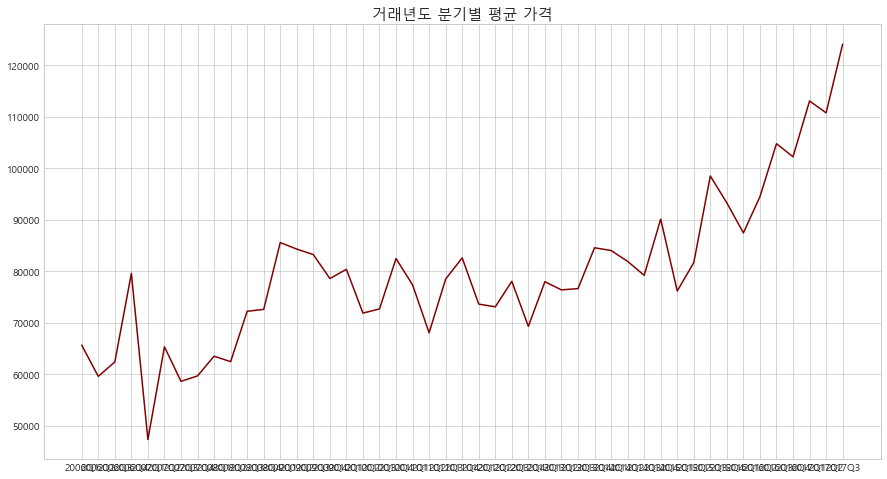

In [116]:
yyyyqrt_prices = []
yyyyqrt_lst = sorted(df_train['yyyyqrt(거래년도 분기별)'].unique())
for yyyyqrt in yyyyqrt_lst:
    yyyyqrt_prices.append(df_train.loc[df_train[
        'yyyyqrt(거래년도 분기별)'] == yyyyqrt, ['price(가격)']].mean())
    
plt.figure(figsize=(15, 8))
plt.plot(yyyyqrt_lst, yyyyqrt_prices, color ='maroon')
plt.title('거래년도 분기별 평균 가격', fontsize=15)
plt.show()

In [90]:
# 거래년도 분기별 시계열로 ordering
df_train['yyyyqrt_ordered'] = df_train['yyyyqrt(거래년도 분기별)']
for i, yyyyqrt in enumerate(yyyyqrt_lst):
    df_train.loc[df_train['yyyyqrt(거래년도 분기별)'] == yyyyqrt, ['yyyyqrt_ordered']] = i + 1

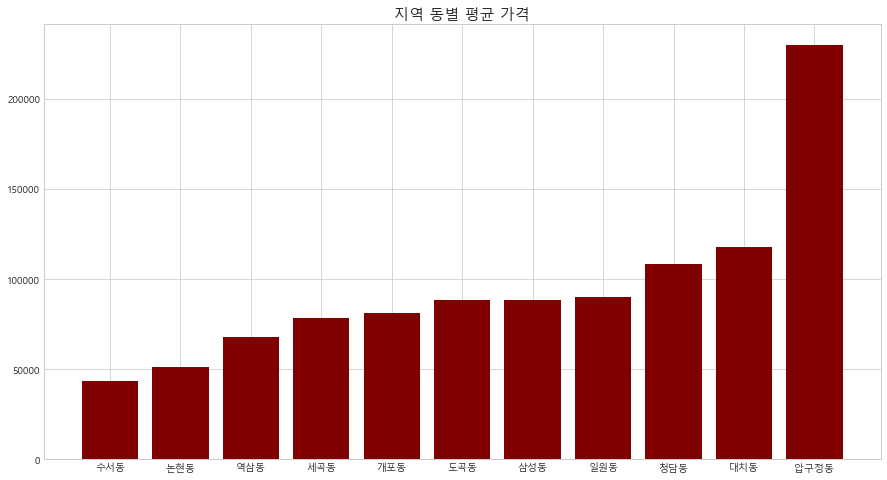

In [113]:
dong_lst = sorted(df_train['dong(동)'].unique())
dong_prices = {dong: 0 for dong in dong_lst}
for dong in dong_lst:
    dong_prices[dong] = df_train.loc[df_train[
        'dong(동)'] == dong, ['price(가격)']].mean()[0]

dong_prices_sorted = dict(sorted(dong_prices.items(), key=lambda item: item[1]))
plt.figure(figsize=(15, 8))
plt.bar(dong_prices_sorted.keys(), dong_prices_sorted.values(), color ='maroon')
plt.title('지역 동별 평균 가격', fontsize=15)
plt.show()

In [114]:
# 지역 동별 평균 가격 순으로 ordering
df_train['dong_ordered'] = df_train['dong(동)']
for i, dong in enumerate(dong_prices_sorted.keys()):
    df_train.loc[df_train['dong(동)'] == dong, ['dong_ordered']] = i + 1

## Test Data Preprocessing

In [117]:
df_test.isnull().sum()

aptnm(아파트 이름)                  0
yyyyqrt(거래년도 분기별)              0
price(가격)                    379
con_year(건축년도)                 0
dong(동)                        0
area(면적)                       0
floor(층수)                      0
Latitude(위도)                   0
Longtitude(경도)                 0
gdp                            0
e_grwth(경제성장률)                 0
Seoul_l.rate(지가상승률)            0
house_rate(담보대출금리)             0
dis_park(국립 공원과의 거리)           0
dis_highschool(고등학교와의 거리)      0
dis_reconst(재개발 지역과의 거리)       0
dis_univ(대학과의 거리)              0
dis_hospital(종합 병원과의 거리)       0
dis_museum(국립 박물관과의 거리)        0
dis_subway(지하철역과의 거리)          0
brand_r(유명 아파트 브랜드순)           0
n_home(세대수)                    0
n_dong(동수)                     0
parking_per(세대별 주차장수)          0
Heater(난방 시스템)                 0
Yongpae(용적률)                  43
Gunpae(건폐율)                   44
Highest(최고층)                   0
Lowest(최저층)                    0
dtype: int64

In [121]:
# check nan values
df_test_yongpae = df_test[df_test['Yongpae(용적률)'].apply(np.isnan)]
df_test_yongpae.isnull().sum()

aptnm(아파트 이름)                 0
yyyyqrt(거래년도 분기별)             0
price(가격)                    43
con_year(건축년도)                0
dong(동)                       0
area(면적)                      0
floor(층수)                     0
Latitude(위도)                  0
Longtitude(경도)                0
gdp                           0
e_grwth(경제성장률)                0
Seoul_l.rate(지가상승률)           0
house_rate(담보대출금리)            0
dis_park(국립 공원과의 거리)          0
dis_highschool(고등학교와의 거리)     0
dis_reconst(재개발 지역과의 거리)      0
dis_univ(대학과의 거리)             0
dis_hospital(종합 병원과의 거리)      0
dis_museum(국립 박물관과의 거리)       0
dis_subway(지하철역과의 거리)         0
brand_r(유명 아파트 브랜드순)          0
n_home(세대수)                   0
n_dong(동수)                    0
parking_per(세대별 주차장수)         0
Heater(난방 시스템)                0
Yongpae(용적률)                 43
Gunpae(건폐율)                  43
Highest(최고층)                  0
Lowest(최저층)                   0
dtype: int64

In [120]:
# check nan values
df_test_gunpae = df_test[df_test['Gunpae(건폐율)'].apply(np.isnan)]
df_test_gunpae.isnull().sum()

aptnm(아파트 이름)                 0
yyyyqrt(거래년도 분기별)             0
price(가격)                    44
con_year(건축년도)                0
dong(동)                       0
area(면적)                      0
floor(층수)                     0
Latitude(위도)                  0
Longtitude(경도)                0
gdp                           0
e_grwth(경제성장률)                0
Seoul_l.rate(지가상승률)           0
house_rate(담보대출금리)            0
dis_park(국립 공원과의 거리)          0
dis_highschool(고등학교와의 거리)     0
dis_reconst(재개발 지역과의 거리)      0
dis_univ(대학과의 거리)             0
dis_hospital(종합 병원과의 거리)      0
dis_museum(국립 박물관과의 거리)       0
dis_subway(지하철역과의 거리)         0
brand_r(유명 아파트 브랜드순)          0
n_home(세대수)                   0
n_dong(동수)                    0
parking_per(세대별 주차장수)         0
Heater(난방 시스템)                0
Yongpae(용적률)                 43
Gunpae(건폐율)                  44
Highest(최고층)                  0
Lowest(최저층)                   0
dtype: int64

In [126]:
df_test_gunpae['aptnm(아파트 이름)'].unique()

array(['개포주공6단지', '개포주공7단지', '신동아'], dtype=object)

In [127]:
# 개포주공5단지 용적률 (151.0), 건폐율(12.0) 평균값으로 대체
df_test.loc[df_test['aptnm(아파트 이름)'] == '개포주공6단지', ['Yongpae(용적률)']] = 151.0
df_test.loc[df_test['aptnm(아파트 이름)'] == '개포주공7단지', ['Yongpae(용적률)']] = 151.0
df_test.loc[df_test['aptnm(아파트 이름)'] == '개포주공6단지', ['Gunpae(건폐율)']] = 12.0
df_test.loc[df_test['aptnm(아파트 이름)'] == '개포주공7단지', ['Gunpae(건폐율)']] = 12.0

# 구글링으로 용적률, 건폐율 NAN 채우기
df_test.loc[df_test['aptnm(아파트 이름)'] == '신동아', ['Yongpae(용적률)']] = 202.0
df_test.loc[df_test['aptnm(아파트 이름)'] == '신동아', ['Gunpae(건폐율)']] = 16.0

In [128]:
df_test = df_test.replace('-', np.nan)
df_test.isnull().sum()

aptnm(아파트 이름)                  0
yyyyqrt(거래년도 분기별)              0
price(가격)                    379
con_year(건축년도)                 0
dong(동)                        0
area(면적)                       0
floor(층수)                      0
Latitude(위도)                   0
Longtitude(경도)                 0
gdp                            0
e_grwth(경제성장률)                 0
Seoul_l.rate(지가상승률)            0
house_rate(담보대출금리)             0
dis_park(국립 공원과의 거리)           0
dis_highschool(고등학교와의 거리)      0
dis_reconst(재개발 지역과의 거리)       0
dis_univ(대학과의 거리)              0
dis_hospital(종합 병원과의 거리)       0
dis_museum(국립 박물관과의 거리)        0
dis_subway(지하철역과의 거리)          0
brand_r(유명 아파트 브랜드순)           0
n_home(세대수)                    0
n_dong(동수)                     0
parking_per(세대별 주차장수)          2
Heater(난방 시스템)                 0
Yongpae(용적률)                   0
Gunpae(건폐율)                    0
Highest(최고층)                   0
Lowest(최저층)                    0
dtype: int64

In [213]:
# 재개발 지역 == 0
df_train.loc[df_train['dis_reconst'] == 0, :]['aptnm'].unique()

array(['개포주공1단지', '개포주공4단지', '개포주공5단지', '개포주공6단지', '개포주공7단지', '롯데캐슬',
       '역삼래미안', '뉴현대파크빌', '삼부아그레빌', '은마', '포이벨리', '거평프리젠', '경남', '동부센트레빌',
       '삼성', '청원', '대우디오빌플러스', '도곡렉슬', '세호시티라이프', '마일스디오빌', '은탑리더스카운티',
       '현대비젼21', '대림', '삼환SOGOOD', '제이빌', '우성리빙텔', '한양럭스', '까치마을', '삼익',
       '개나리푸르지오', '쌍용', '대치한신휴플러스', '대치현대', '상지리츠빌', '이안애2차', '래미안삼성2차',
       '대림아크로빌', '동양', '논현웰스톤', '대치아이파크', '신동아', '베스젠빌', '수서한아름', '역삼우성',
       '역삼푸르지오', '한화진넥스빌', '삼성팰리스(71-16)', '우성캐릭터199', '대치효성', '포스코트',
       '채널리저브', '선릉역풍림아이원레몬', '쌍용플래티넘', '금호어울림', '삼성파크', '한림', '도곡쌍용예가'],
      dtype=object)

In [214]:
df_test.loc[df_test['dis_reconst'] == 0, :]['aptnm'].unique()

array(['개포주공1단지', '개포주공5단지', '개포주공6단지', '동일파크스위트', '래미안삼성2차'],
      dtype=object)

In [129]:
df_test_parking = df_test[df_test['parking_per(세대별 주차장수)'].apply(np.isnan)]

df_test_parking['aptnm(아파트 이름)'].unique()

array(['선경3차', '신동아'], dtype=object)

In [130]:
# 아파트별 세대별 주차장수 평균값으로 대체
df_test.loc[df_test['aptnm(아파트 이름)'] == '신동아', ['parking_per(세대별 주차장수)']] = 0.585000

# 1990년 이전에 지어진 아파트 세대별 주차장수 평균값으로 대체
df_test.loc[df_test['aptnm(아파트 이름)'] == '선경3차', ['parking_per(세대별 주차장수)']] = 0.605487

In [131]:
df_test.isnull().sum()

aptnm(아파트 이름)                  0
yyyyqrt(거래년도 분기별)              0
price(가격)                    379
con_year(건축년도)                 0
dong(동)                        0
area(면적)                       0
floor(층수)                      0
Latitude(위도)                   0
Longtitude(경도)                 0
gdp                            0
e_grwth(경제성장률)                 0
Seoul_l.rate(지가상승률)            0
house_rate(담보대출금리)             0
dis_park(국립 공원과의 거리)           0
dis_highschool(고등학교와의 거리)      0
dis_reconst(재개발 지역과의 거리)       0
dis_univ(대학과의 거리)              0
dis_hospital(종합 병원과의 거리)       0
dis_museum(국립 박물관과의 거리)        0
dis_subway(지하철역과의 거리)          0
brand_r(유명 아파트 브랜드순)           0
n_home(세대수)                    0
n_dong(동수)                     0
parking_per(세대별 주차장수)          0
Heater(난방 시스템)                 0
Yongpae(용적률)                   0
Gunpae(건폐율)                    0
Highest(최고층)                   0
Lowest(최저층)                    0
dtype: int64

In [132]:
# Heater one-hot encoding
heater_test_encoding = pd.get_dummies(df_test['Heater(난방 시스템)']).rename(columns={
    '개별난방': 'heater_indi', '중앙난방': 'heater_cent', '지역난방': 'heater_local'})

df_test = df_test.join(heater_test_encoding)

In [139]:
# 거래년도 분기별 시계열로 ordering
df_test['yyyyqrt_ordered'] = len(yyyyqrt_lst)

In [134]:
# 지역 동별 평균 가격 순으로 ordering
df_test['dong_ordered'] = df_test['dong(동)']
for i, dong in enumerate(dong_prices_sorted.keys()):
    df_test.loc[df_test['dong(동)'] == dong, ['dong_ordered']] = i + 1

## Train Data EDA

In [13]:
# discrete variables
discrete_vars = ['aptnm(아파트 이름)', 'yyyyqrt(거래년도 분기별)', 'con_year(건축년도)', 
                 'dong(동)', 'floor(층수)', 'brand_r(유명 아파트 브랜드순)', 
                 'n_home(세대수)', 'n_dong(동수)', 'Heater(난방 시스템)',
                 'Highest(최고층)', 'Lowest(최저층)']

# continuous variables
continuous_vars = ['area(면적)', 'Latitude(위도)', 'Longtitude(경도)',
                   'gdp', 'e_grwth(경제성장률)', 'Seoul_l.rate(지가상승률)', 'house_rate(담보대출금리)',
                   'dis_park(국립 공원과의 거리)', 'dis_highschool(고등학교와의 거리)',
                   'dis_reconst(재개발 지역과의 거리)', 'dis_univ(대학과의 거리)', 
                   'dis_hospital(종합 병원과의 거리)', 'dis_museum(국립 박물관과의 거리)',
                   'dis_subway(지하철역과의 거리)', 'parking_per(세대별 주차장수)',
                   'Yongpae(용적률)', 'Gunpae(건폐율)']

aptnm(아파트 이름) 185
['강남역우정에쉐르' '개포주공1단지' '개포주공4단지' '개포주공5단지' '공간쉐르빌' '구산' '금호어울림' '대림역삼'
 '대우디오빌플러스' '대우리츠카운티' '대치현대' '동부센트레빌' '롯데캐슬' '리더스' '명인갤러리2차' '삼부아그레빌'
 '삼성파크' '삼환' '역삼래미안' '역삼우성' '역삼우정에쉐르2' '역삼푸르지오' '우림루미아트1' '월성빌라트' '은마'
 '은하수' '청구' '한신오페라하우스' '한화진넥스빌' '현대까르띠에710' '현대하이츠' 'SM드림빌' '갤러리아트'
 '갤러리하우스' '거평프리젠' '경남' '경일역삼' '까치마을' '뉴현대파크빌' '대치효성' '도곡렉슬' '동익' '두영'
 '리치아르떼빌' '마일스디오빌' '목련타운' '목화' '미켈란147' '삼성' '삼익' '샘터마을' '신동아' '연세리버테라스'
 '영무예다음' '우성' '우정에쉐르' '울트라멤버스' '지석천평대' '청담우방' '탑팰리스' '테크노빌라트' '토미빌(228-9)'
 '포이벨리' '현대비젼21' '가람' '개나리래미안' '개나리푸르지오' '경남논현' '다우림하우스' '대림' '대치한신휴플러스'
 '도곡쌍용예가' '베스젠빌' '삼성그랑빌' '상록수' '세방타운하우스' '세호시티라이프' '수서한아름' '쌍용' '은탑리더스카운티'
 '청담그랑빌' '포스코트' '한림' '한양럭스' '현대2차' '노블스위트' '동구싼타빌' '동양' '선릉역풍림아이원레몬'
 '역삼디오슈페리움' '역삼열성카이스빌' '역삼예명' '우정에쉐르3' '정원' '청원' '포스코더샵' '현대' '현대빌라트'
 '개포한신' '노블테라스' '논현베르빌' '논현아트빌' '대림아크로빌' '대우' '대치하나빌' '도성' '삼성빌라트' '이안애2차'
 '제이빌' '케럿스테이트' '케이씨빌' '힐타워' '강남한솔' '대명비발디' '마블하우스' '삼환SOGOOD' '세연파크뷰'
 '신동아듀크빌' '원팰리스' '청담범신칼릭스빌2차' '그랑디오스' '그랜빌캐슬' '노빌리티빌

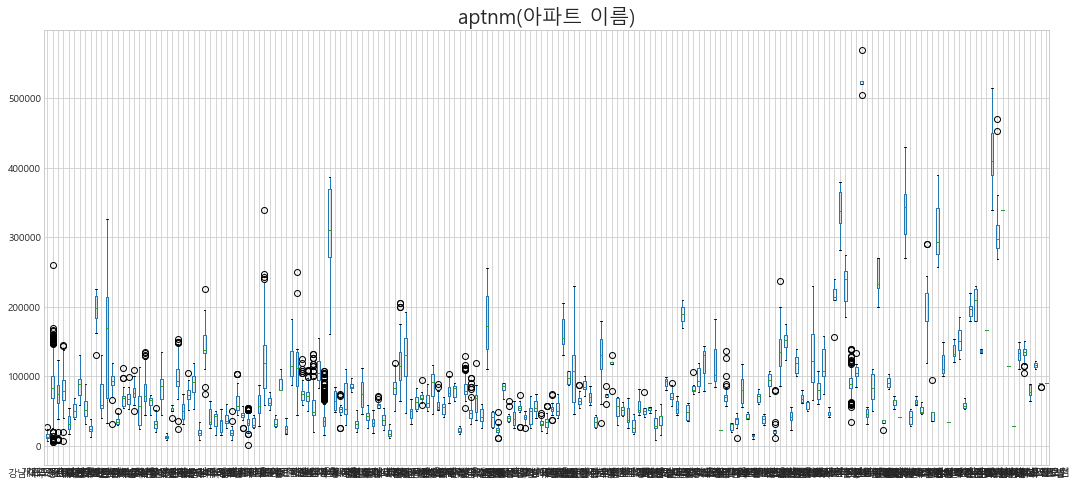

yyyyqrt(거래년도 분기별) 47
['2006Q1' '2006Q2' '2006Q3' '2006Q4' '2007Q1' '2007Q2' '2007Q3' '2007Q4'
 '2008Q1' '2008Q2' '2008Q3' '2008Q4' '2009Q1' '2009Q2' '2009Q3' '2009Q4'
 '2010Q1' '2010Q2' '2010Q3' '2010Q4' '2011Q1' '2011Q2' '2011Q3' '2011Q4'
 '2012Q1' '2012Q2' '2012Q3' '2012Q4' '2013Q1' '2013Q2' '2013Q3' '2013Q4'
 '2014Q1' '2014Q2' '2014Q3' '2014Q4' '2015Q1' '2015Q2' '2015Q3' '2015Q4'
 '2016Q1' '2016Q2' '2016Q3' '2016Q4' '2017Q1' '2017Q2' '2017Q3']


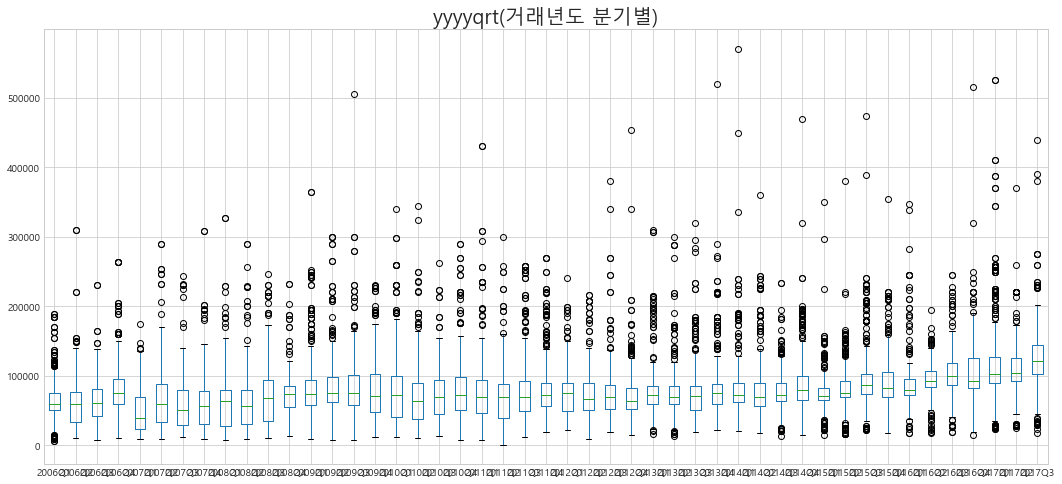

con_year(건축년도) 29
[2004 1982 1983 2003 1993 1997 2001 1999 1998 2005 2002 2006 1994 1979
 1992 1996 1995 1986 1980 1978 1984 2000 2007 2008 2009 2010 2012 2011
 1989]


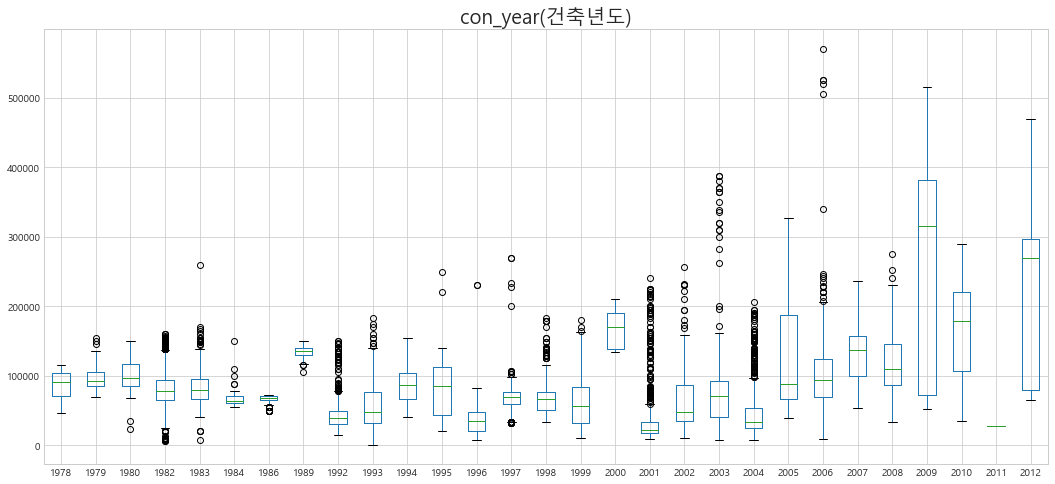

dong(동) 11
['역삼동' '개포동' '청담동' '대치동' '삼성동' '논현동' '도곡동' '수서동' '일원동' '압구정동' '세곡동']


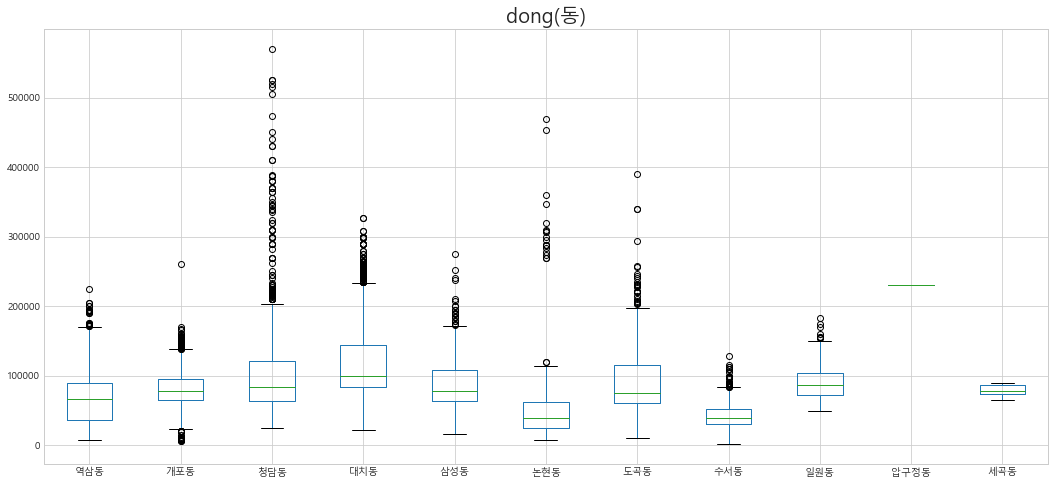

floor(층수) 40
[ 7  3  5  4  2  1 11 14 12  9 13 10  6  8 18 16 21 19 17 20 22 23 15 24
 26 45 28 25 27 44 43 34 -1 38 29 35 39 31 37 32]


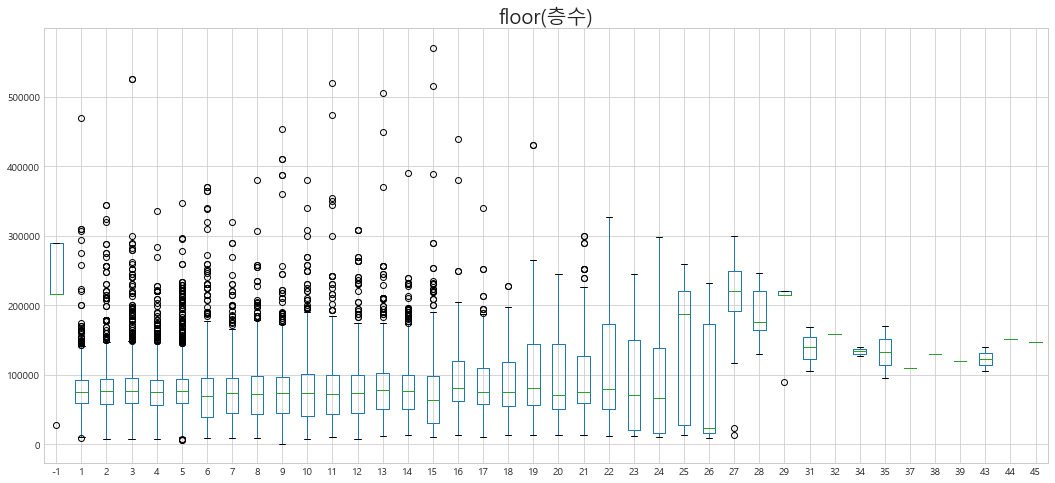

brand_r(유명 아파트 브랜드순) 6
[ 0  1 12  8 14  7]


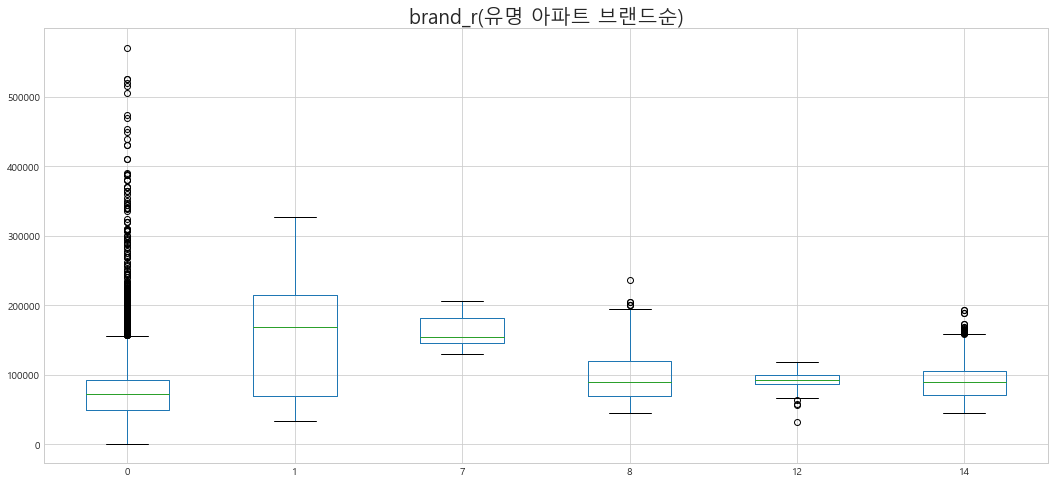

n_home(세대수) 94
[  52 5040 2840  940   17   37  183  129  168   19  630  805  206  142
   10   14   67  114  184 1050  390   12   70  738   42 4424   63  167
  294  137   16   15  113  678  164  348 1404   83 3002  330   11  260
  650  680  231  645  247  628  106 1162   45   40  100   18   24  232
  496  438  332   60  197   66  384  740  498  111   64  558   44  276
  120  620  364   65  490  110   32  199   78   13   39  275  288  768
   88  150   38    9  144   36   33  108  354  912]


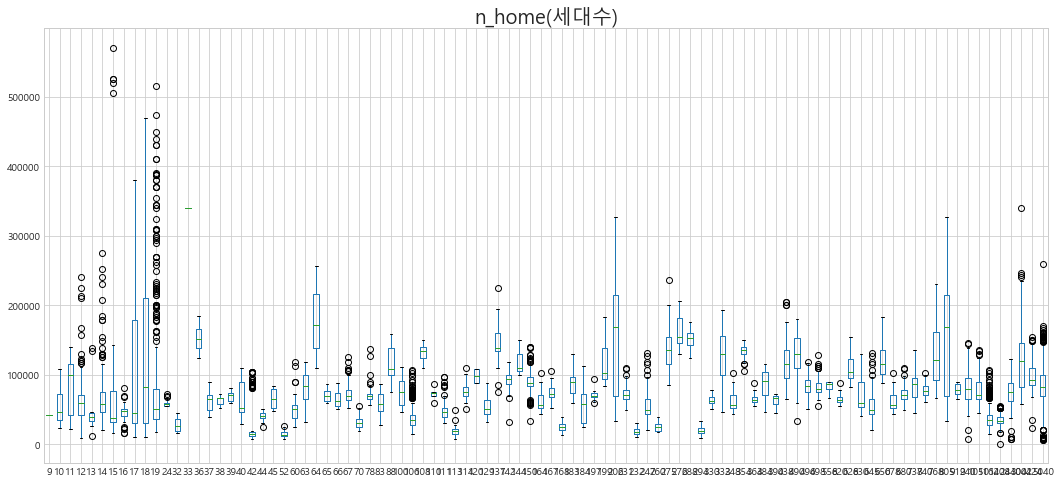

n_dong(동수) 18
[  1 124  58   6   3   8   7  12   2  11  28   9   4  34   5  13  22  16]


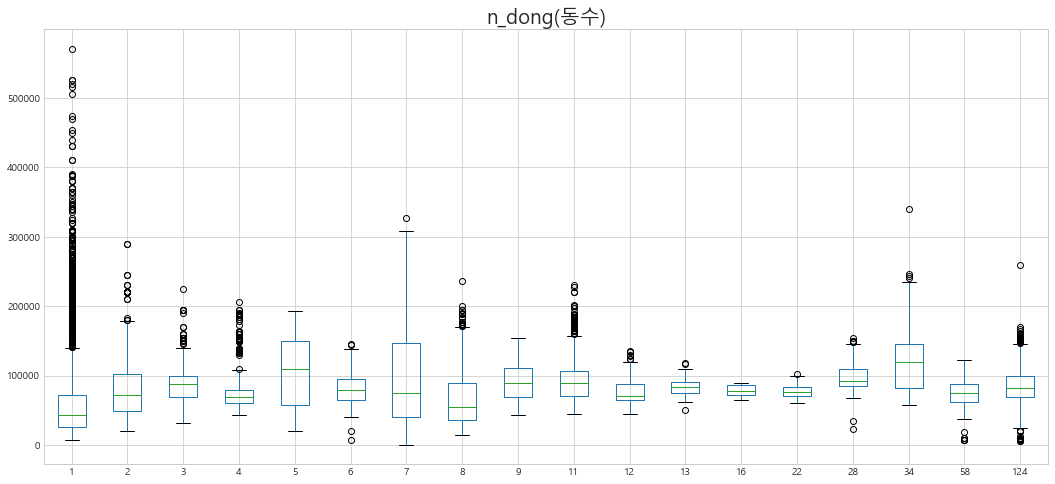

Heater(난방 시스템) 3
['개별난방' '지역난방' '중앙난방']


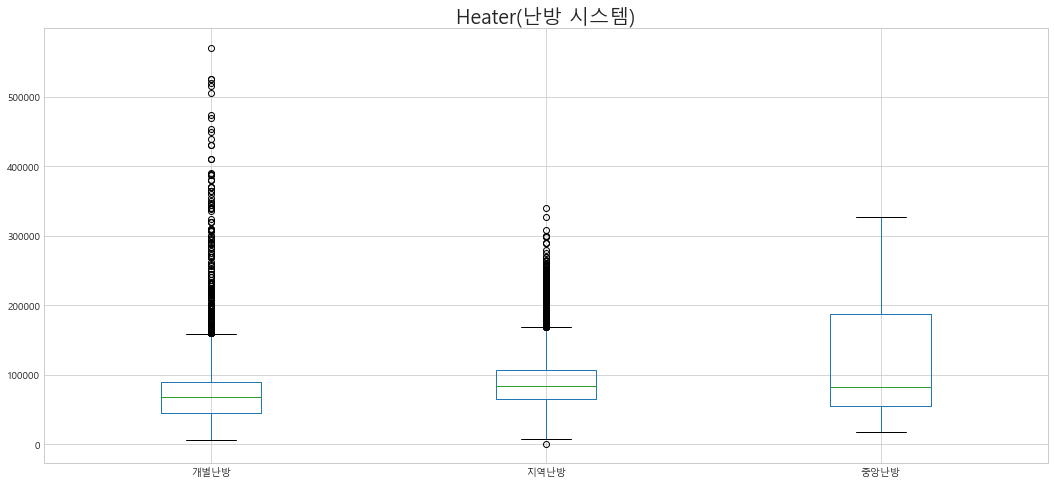

Highest(최고층) 27
[13  5 14  6  9 15 18  7 24 29 21 22 16 11 12 26 17 25 23 10  4 27  8 46
 31 20 19]


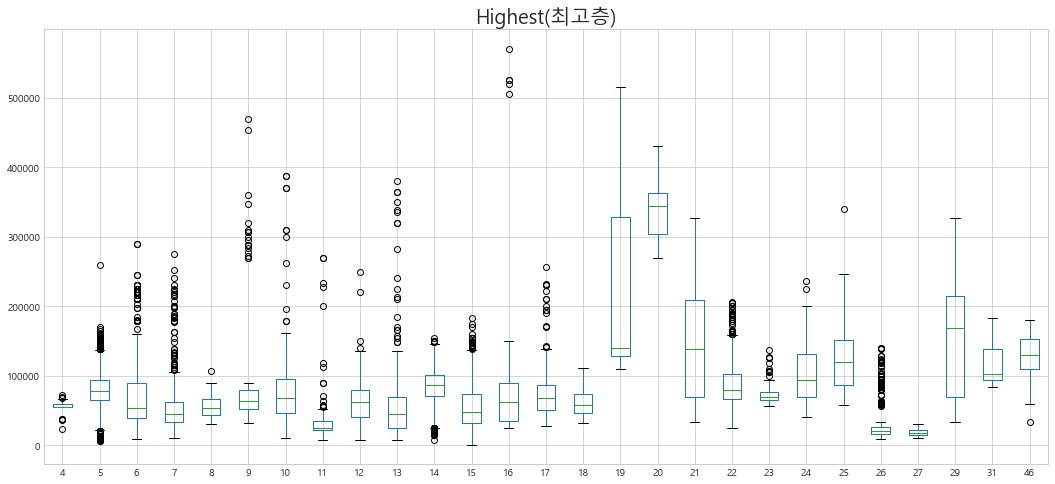

Lowest(최저층) 23
[12  5 13  6 10  7 24 19 14  8 15 11  4  9 26  3 17 20 16 22 18 23 21]


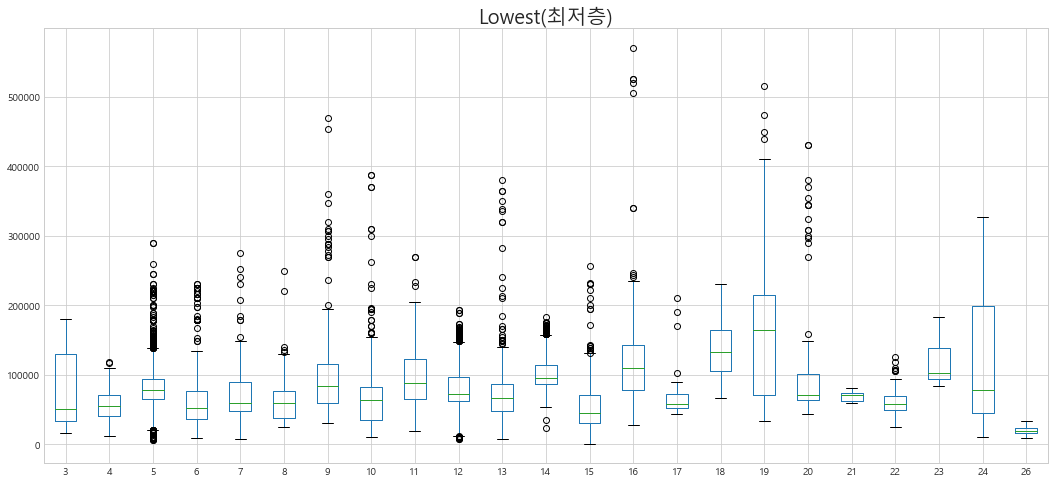

In [14]:
# discrete variables
for col in discrete_vars:
    col_vars = df_train[col].unique()
    print(col, len(col_vars))
    print(col_vars)
    
    total_prices = pd.DataFrame()
    col_prices = df_train.loc[:, [col, 'price(가격)']]
    for var in col_vars:
        var_prices = col_prices.loc[col_prices[col] == var, ['price(가격)']].rename(
            columns={'price(가격)': var})

        total_prices = pd.concat([total_prices, var_prices])

    plt.figure(figsize=(18, 8))
    total_prices.boxplot()
    
    plt.title(col, fontsize=20)
    plt.show()

In [15]:
df_corr = df_train.corr().round(3)

df_corr[df_corr >= 0.6]

# con_year(건축년도) ~ parking_per(세대별 주차장수), Highest(최고층)
# area(면적) ~ parking_per(세대별 주차장수)
# floor(층수) ~ Highest(최고층)
# Longtitude(경도) ~ dis_univ(대학과의 거리)
# dis_hospital(종합 병원과의 거리) ~ dis_subway(지하철역과의 거리), n_dong(동수)
# n_home(세대수) ~ n_dong(동수)
# Yongpae(용적률) ~ Gunpae(건폐율)
# Highest(최고층) ~ Lowest(최저층)

,price(가격),con_year(건축년도),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,e_grwth(경제성장률),Seoul_l.rate(지가상승률),house_rate(담보대출금리),...,dis_museum(국립 박물관과의 거리),dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),parking_per(세대별 주차장수),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
price(가격),1.000,NaN,0.712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
con_year(건축년도),NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.600,NaN,NaN,0.649,NaN
area(면적),0.712,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.754,NaN,NaN,NaN,NaN
floor(층수),NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.648,NaN
Latitude(위도),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longtitude(경도),NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gdp,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_grwth(경제성장률),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seoul_l.rate(지가상승률),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
house_rate(담보대출금리),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


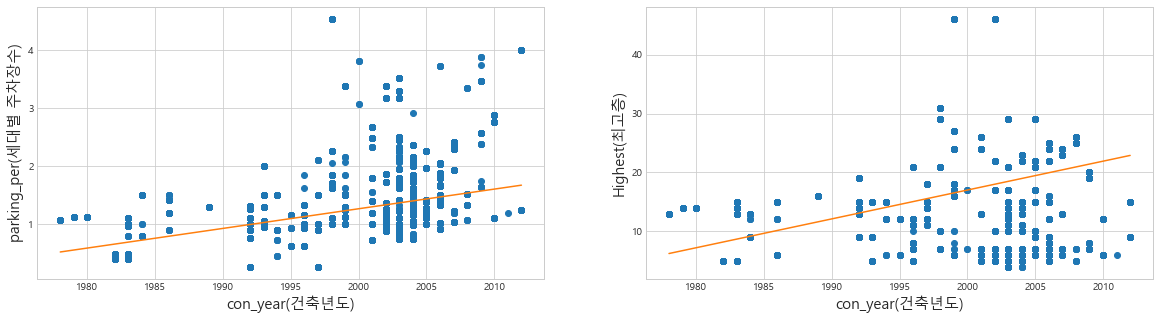

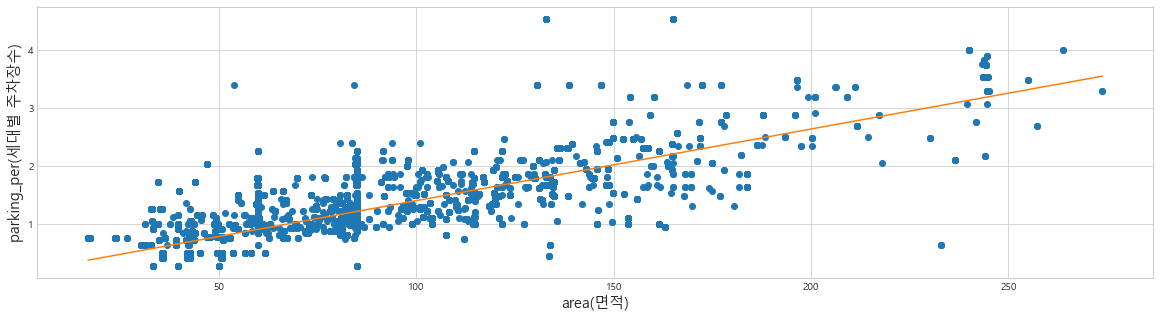

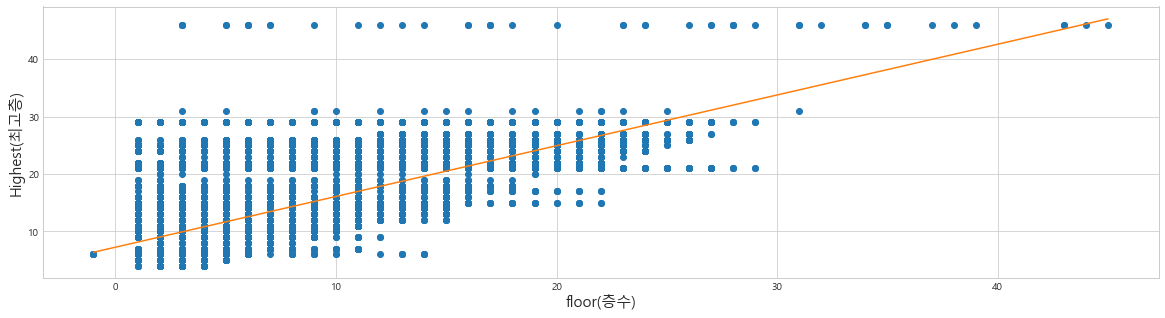

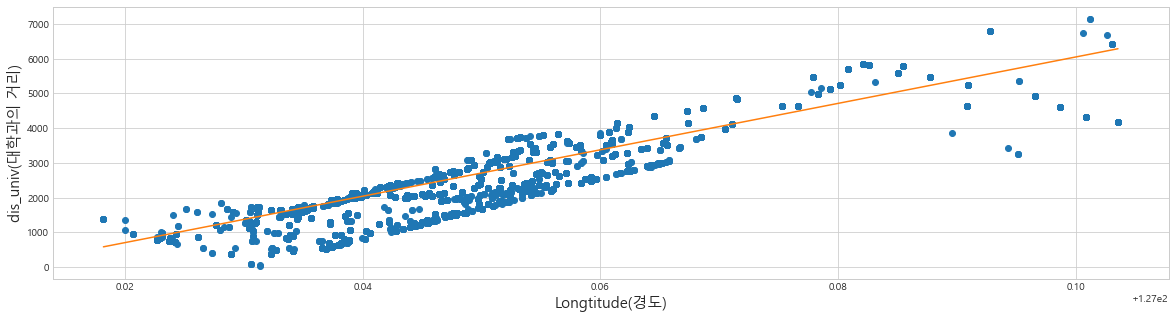

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


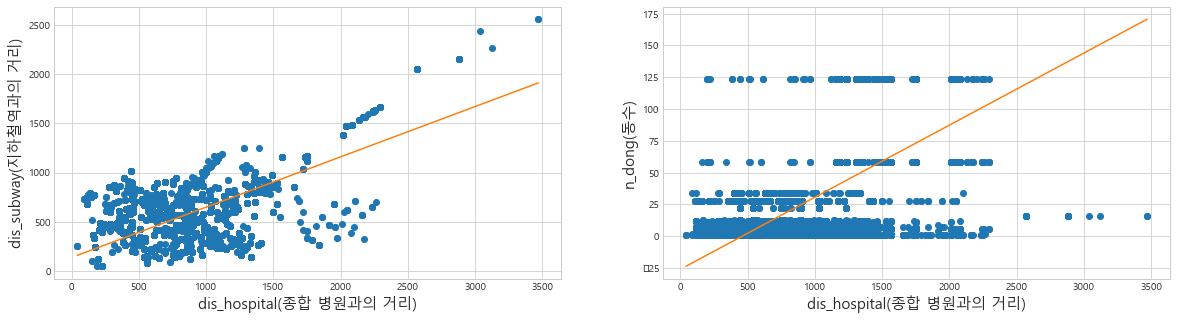

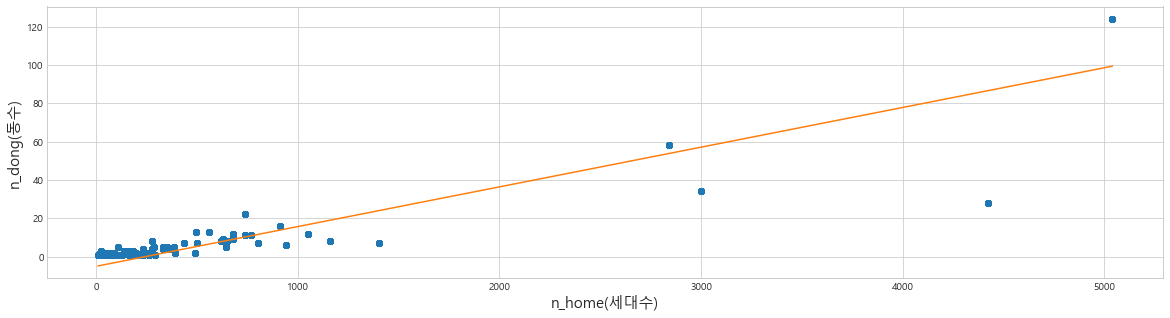

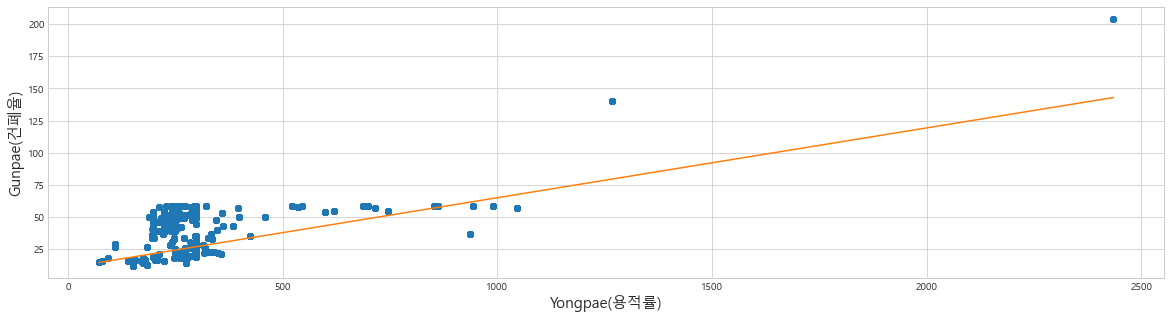

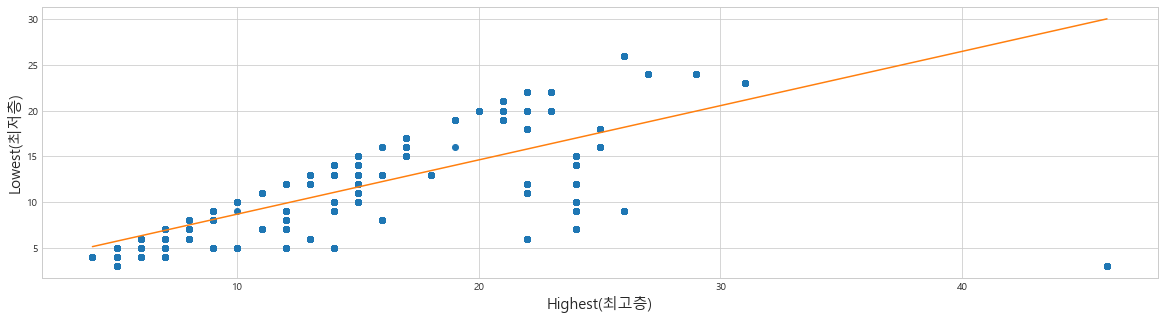

In [17]:
check_cols = {'con_year(건축년도)': ['parking_per(세대별 주차장수)', 'Highest(최고층)'],
              'area(면적)': ['parking_per(세대별 주차장수)'],
              'floor(층수)': ['Highest(최고층)'],
              'Longtitude(경도)': ['dis_univ(대학과의 거리)'],
              'dis_hospital(종합 병원과의 거리)': ['dis_subway(지하철역과의 거리)', 'n_dong(동수)'],
              'n_home(세대수)': ['n_dong(동수)'],
              'Yongpae(용적률)': ['Gunpae(건폐율)'],
              'Highest(최고층)': ['Lowest(최저층)']}

for key, values in check_cols.items():
    plt.figure(figsize=(20, 5))
    for i, col_vars in enumerate(values):
        plt.subplot(1, len(values), i+1)
        x = df_train[key]
        y = df_train[col_vars]
        plt.plot(x, y, 'o')
        plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
        plt.xlabel(key, fontsize=15)
        plt.ylabel(col_vars, fontsize=15)
    
# Longtitude(경도) ~ dis_univ(대학과의 거리) -> positive correlation captured
# Highest(최고층) ~ Lowest(최저층) -> positive correlation captured

In [18]:
df_corr[df_corr <= -0.6]

# con_year(건축년도) ~ dis_univ(대학과의 거리), n_home(세대수), n_dong(동수)
# Latitude(위도) ~ dis_univ(대학과의 거리)
# Highest(최고층) ~ n_dong(동수)

,price(가격),con_year(건축년도),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,e_grwth(경제성장률),Seoul_l.rate(지가상승률),house_rate(담보대출금리),...,dis_museum(국립 박물관과의 거리),dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),parking_per(세대별 주차장수),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
price(가격),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
con_year(건축년도),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.792,-0.677,NaN,NaN,NaN,NaN,NaN
area(면적),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor(층수),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude(위도),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longtitude(경도),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gdp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_grwth(경제성장률),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seoul_l.rate(지가상승률),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
house_rate(담보대출금리),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


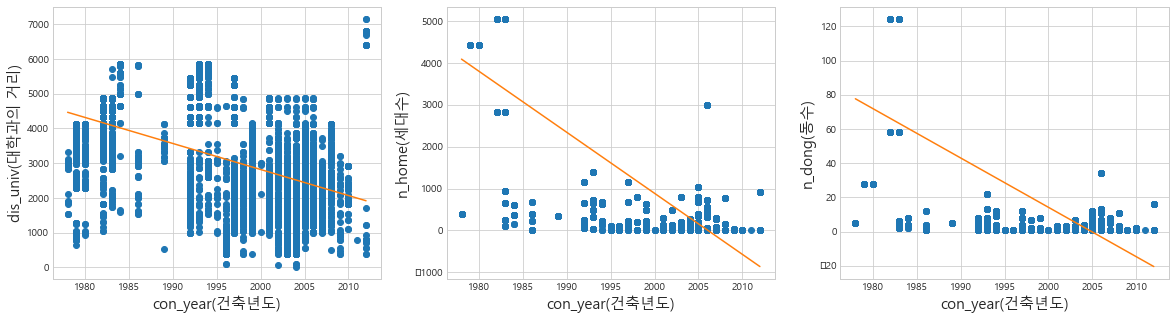

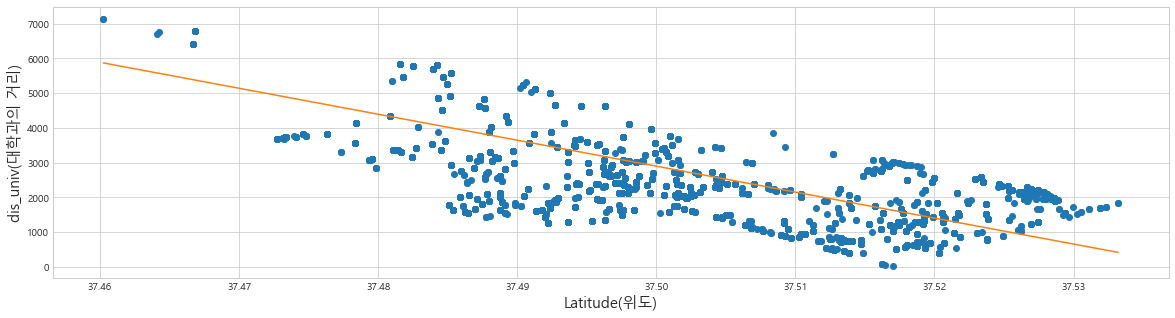

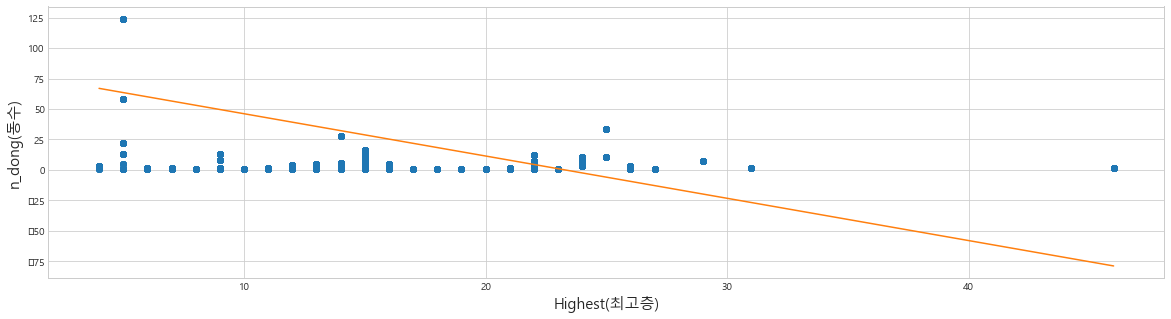

In [19]:
check_cols = {'con_year(건축년도)': ['dis_univ(대학과의 거리)', 'n_home(세대수)', 'n_dong(동수)'],
              'Latitude(위도)': ['dis_univ(대학과의 거리)'],
              'Highest(최고층)': ['n_dong(동수)']}

for key, values in check_cols.items():
    plt.figure(figsize=(20, 5))
    for i, col_vars in enumerate(values):
        plt.subplot(1, len(values), i+1)
        x = df_train[key]
        y = df_train[col_vars]
        plt.plot(x, y, 'o')
        plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
        plt.xlabel(key, fontsize=15)
        plt.ylabel(col_vars, fontsize=15)
    
# Latitude(위도) ~ dis_univ(대학과의 거리) -> negative correlation captured

In [141]:
# change column names
col_names = {}
for word in list(df_train.columns):
    col_names[word] = word.split('(')[0]
    
df_train.rename(columns=col_names, inplace=True)
df_test.rename(columns=col_names, inplace=True)

In [142]:
df_train.rename(columns={'Seoul_l.rate': 'Seoul_l'}, inplace=True)
df_test.rename(columns={'Seoul_l.rate': 'Seoul_l'}, inplace=True)

In [ ]:
# # Longtitude(경도) ~ dis_univ(대학과의 거리) -> positive correlation captured
# # Highest(최고층) ~ Lowest(최저층) -> positive correlation captured
# # Latitude(위도) ~ dis_univ(대학과의 거리) -> negative correlation captured

# df_train.drop(['dis_univ', 'Lowest'], axis=1, inplace=True)
# df_train_y = df_train['price']
# df_train_x = df_train.drop('price', axis=1, inplace=False)

## Training Model

In [149]:
df_train.columns

Index(['aptnm', 'yyyyqrt', 'price', 'con_year', 'dong', 'area', 'floor',
       'Latitude', 'Longtitude', 'gdp', 'e_grwth', 'Seoul_l', 'house_rate',
       'dis_park', 'dis_highschool', 'dis_reconst', 'dis_univ', 'dis_hospital',
       'dis_museum', 'dis_subway', 'brand_r', 'n_home', 'n_dong',
       'parking_per', 'Heater', 'Yongpae', 'Gunpae', 'Highest', 'Lowest',
       'heater_indi', 'heater_cent', 'heater_local', 'yyyyqrt_ordered',
       'dong_ordered'],
      dtype='object')

In [150]:
df_train_y = df_train['price']
df_train_x = df_train.drop(['price', 'aptnm', 'yyyyqrt', 'dong', 'Heater'], axis=1, inplace=False)

In [151]:
# divide train, test into 7:3 ratio
df_train_raw_x, df_test_raw_x, df_train_raw_y, df_test_raw_y \
    = train_test_split(df_train_x, df_train_y, test_size=0.3, random_state=1234)

print('train data X size: {}'.format(df_train_raw_x.shape))
print('train data Y size: {}'.format(df_train_raw_y.shape))
print('test data X size: {}'.format(df_test_raw_x.shape))
print('test data Y size: {}'.format(df_test_raw_y.shape))

train data X size: (12180, 29)
train data Y size: (12180,)
test data X size: (5220, 29)
test data Y size: (5220,)


In [147]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_raw_x, df_train_raw_y)

print('Score on training set: {:.3f}'.format(rf_uncustomized.score(df_train_raw_x, df_train_raw_y)))
print('Score on test set: {:.3f}'.format(rf_uncustomized.score(df_test_raw_x, df_test_raw_y)))

Score on training set: 0.996
Score on test set: 0.974


### RF parameter: n_estimators

In [177]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_raw_x, df_train_raw_y)
    train_score.append(rf.score(df_train_raw_x, df_train_raw_y))
    test_score.append(rf.score(df_test_raw_x, df_test_raw_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [178]:
df_score_n['Gap'] = df_score_n['TrainScore'] - df_score_n['TestScore']
df_score_n.round(3)

,n_estimators,TrainScore,TestScore,Gap
0,10,0.993,0.971,0.022
1,20,0.994,0.972,0.023
2,30,0.995,0.973,0.022
3,40,0.995,0.973,0.022
4,50,0.995,0.973,0.022
5,60,0.995,0.973,0.022
6,70,0.995,0.974,0.022
7,80,0.996,0.974,0.022
8,90,0.996,0.974,0.022
9,100,0.996,0.974,0.022


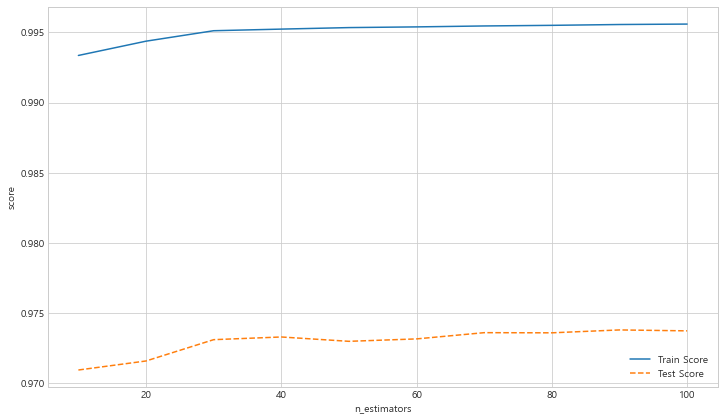

In [180]:
plt.figure(figsize=(12, 7))
plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()
plt.grid(True)

# 생성하는 결정 트리 수 증가에 따라 모델의 설명력 증가
# 트리 수가 60개를 초과해도 설명력 거의 향상되지 않음
# 최대 트리 수에 따른 영향을 배제하고 다른 파라미터의 영향을 확인하고자 100 선택

### RF parameter: min_samples_leaf

In [181]:
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100,
                                 min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_raw_x, df_train_raw_y)
    train_score.append(rf.score(df_train_raw_x, df_train_raw_y))
    test_score.append(rf.score(df_test_raw_x, df_test_raw_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [182]:
df_score_leaf['Gap'] = df_score_leaf['TrainScore'] - df_score_leaf['TestScore']
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore,Gap
0,1,0.996,0.974,0.022
1,2,0.992,0.973,0.019
2,3,0.989,0.972,0.017
3,4,0.986,0.971,0.015
4,5,0.983,0.969,0.014
5,6,0.980,0.968,0.012
6,7,0.977,0.967,0.011
7,8,0.975,0.965,0.010
8,9,0.972,0.963,0.008
9,10,0.969,0.962,0.006


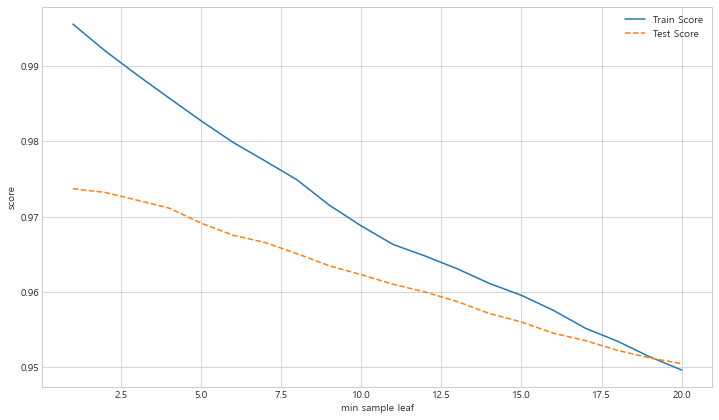

In [184]:
plt.figure(figsize=(12, 7))
plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('min sample leaf')
plt.legend()
plt.grid(True)

# 잎사귀 노드 최소 자료 수 증가에 따라 모델의 설명력 감소
# train, test score 둘 다 크면서 둘의 차이가 작은 잎사귀 노드 최소 자료 수 10개 선택

### RF parameter: min_samples_split

In [186]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100,
                                 min_samples_leaf=10, min_samples_split=v_min_samples_split)
    rf.fit(df_train_raw_x, df_train_raw_y)
    train_score.append(rf.score(df_train_raw_x, df_train_raw_y))
    test_score.append(rf.score(df_test_raw_x, df_test_raw_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [187]:
df_score_split['Gap'] = df_score_split['TrainScore'] - df_score_split['TestScore']
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore,Gap
0,4,0.969,0.962,0.006
1,6,0.969,0.962,0.006
2,8,0.969,0.962,0.006
3,10,0.969,0.962,0.006
4,12,0.969,0.962,0.006
5,14,0.969,0.962,0.006
6,16,0.969,0.962,0.006
7,18,0.969,0.962,0.006
8,20,0.969,0.962,0.006
9,22,0.967,0.962,0.006


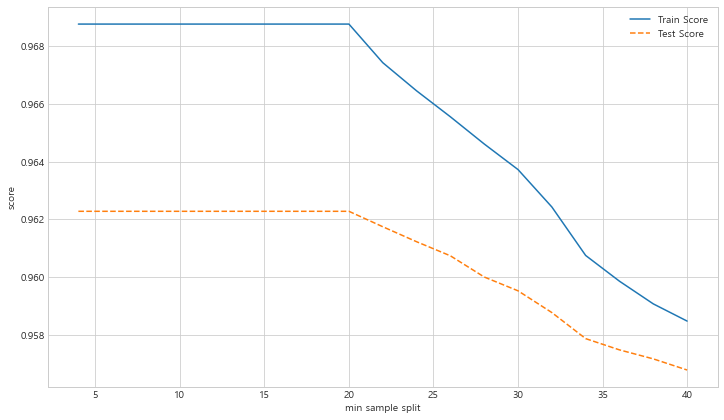

In [189]:
plt.figure(figsize=(12, 7))
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('min sample split')
plt.legend()
plt.grid(True)

# 분리 노드 최소 자료 수 증가에 따라 모델의 설명력 감소
# train, test score 변화 고려하여 분리 노드 최소 자료 수 20개 선택

### RF parameter: max_depth

In [190]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100,
                                 min_samples_leaf=10, min_samples_split=20,
                                 max_depth=v_max_depth)
    rf.fit(df_train_raw_x, df_train_raw_y)
    train_score.append(rf.score(df_train_raw_x, df_train_raw_y))
    test_score.append(rf.score(df_test_raw_x, df_test_raw_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [191]:
df_score_depth['Gap'] = df_score_depth['TrainScore'] - df_score_depth['TestScore']
df_score_depth.round(3)

,Depth,TrainScore,TestScore,Gap
0,1,0.388,0.413,-0.025
1,2,0.611,0.622,-0.012
2,3,0.773,0.772,0.001
3,4,0.840,0.836,0.004
4,5,0.877,0.873,0.004
5,6,0.904,0.898,0.006
6,7,0.926,0.919,0.007
7,8,0.942,0.936,0.006
8,9,0.952,0.946,0.006
9,10,0.959,0.953,0.006


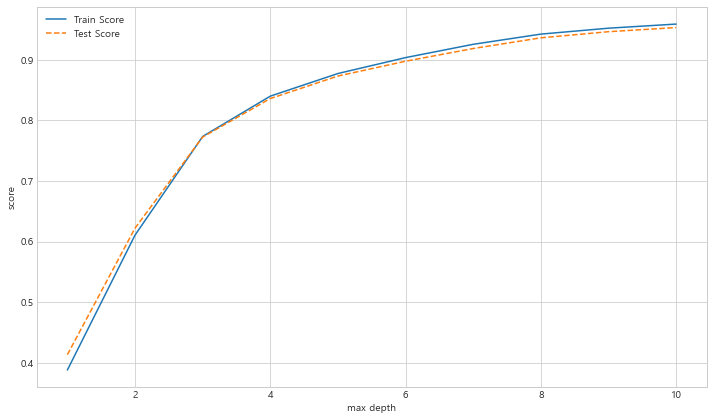

In [193]:
plt.figure(figsize=(12, 7))
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()
plt.grid(True)

# 최대 깊이 증가에 따라 모델 설명력 증가
# train, test score 변화 고려하여 최대 깊이 7 선택

## Final Model

In [198]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=100)
rf_final.fit(df_train_raw_x, df_train_raw_y)

print('Score on training set: {:.3f}'.format(rf_final.score(df_train_raw_x, df_train_raw_y)))
print('Score on test set: {:.3f}'.format(rf_final.score(df_test_raw_x, df_test_raw_y)))

Score on training set: 0.996
Score on test set: 0.974


In [201]:
rf_y_pred = rf_final.predict(df_test_raw_x)

print(mean_squared_error(df_test_raw_y, rf_y_pred))

52266573.273068376


## Test Prediction

In [199]:
df_test.columns

Index(['aptnm', 'yyyyqrt', 'price', 'con_year', 'dong', 'area', 'floor',
       'Latitude', 'Longtitude', 'gdp', 'e_grwth', 'Seoul_l', 'house_rate',
       'dis_park', 'dis_highschool', 'dis_reconst', 'dis_univ', 'dis_hospital',
       'dis_museum', 'dis_subway', 'brand_r', 'n_home', 'n_dong',
       'parking_per', 'Heater', 'Yongpae', 'Gunpae', 'Highest', 'Lowest',
       'heater_indi', 'heater_cent', 'heater_local', 'yyyyqrt_ordered',
       'dong_ordered'],
      dtype='object')

In [200]:
df_test_x = df_test.drop(['price', 'aptnm', 'yyyyqrt', 'dong', 'Heater'], axis=1, inplace=False)

In [203]:
rf_result = RandomForestRegressor(random_state=1234, n_estimators=100)
rf_result.fit(df_train_x, df_train_y)

rf_test_y_pred = rf_result.predict(df_test_x)

In [210]:
df_test['price'] = rf_test_y_pred

df_test.to_csv('./price_prediction.csv', encoding='euc-kr', index=False)
df_test

,aptnm,yyyyqrt,price,con_year,dong,area,floor,Latitude,Longtitude,gdp,...,Heater,Yongpae,Gunpae,Highest,Lowest,heater_indi,heater_cent,heater_local,yyyyqrt_ordered,dong_ordered
0,강남역우정에쉐르,2017Q4,19144.000000,2004,역삼동,17.23,12,37.491379,127.034880,446228,...,개별난방,536.0,58.0,13,12,1,0,0,47,3
1,강변상지리츠빌,2017Q4,194631.410000,2001,청담동,171.79,9,37.521477,127.045412,446228,...,개별난방,397.0,57.0,13,13,1,0,0,47,9
2,개나리래미안,2017Q4,122960.166667,2006,역삼동,84.93,2,37.502200,127.043741,446228,...,지역난방,273.0,21.0,22,11,0,0,1,47,3
3,개나리래미안,2017Q4,156067.000000,2006,역삼동,144.98,8,37.484510,127.054289,446228,...,지역난방,273.0,21.0,22,11,0,0,1,47,3
4,개나리래미안,2017Q4,143648.000000,2006,역삼동,129.80,8,37.498740,127.049812,446228,...,지역난방,273.0,21.0,22,11,0,0,1,47,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,한화진넥스빌,2017Q4,28389.500000,2001,역삼동,43.58,23,37.497768,127.046819,446228,...,개별난방,1045.0,57.0,26,26,1,0,0,47,3
375,한화진넥스빌,2017Q4,28887.500000,2001,역삼동,43.58,8,37.499314,127.045795,446228,...,개별난방,1045.0,57.0,26,26,1,0,0,47,3
376,현대,2017Q4,105390.000000,1994,개포동,133.68,2,37.478407,127.061375,446228,...,중앙난방,2435.0,204.0,15,15,0,1,0,47,5
377,현대까르띠에710,2017Q4,146543.000000,2001,역삼동,149.70,13,37.499314,127.045795,446228,...,중앙난방,298.0,20.0,24,10,0,1,0,47,3


## One-hot encoding Control Group

In [156]:
# yyyyqrt one-hot encoding
yyyyqrt_train_encoding = pd.get_dummies(df_train['yyyyqrt'])

df_train = df_train.join(yyyyqrt_train_encoding)

In [161]:
yyyyqrt_rename = {}
for key in df_train['yyyyqrt'].unique():
    yyyyqrt_rename[key] = 'yyyyqrt_' + key
    
df_train = df_train.rename(columns=yyyyqrt_rename)

In [168]:
# dong one-hot encoding
dong_train_encoding = pd.get_dummies(df_train['dong'])

df_train = df_train.join(dong_train_encoding)

In [169]:
dong_rename = {}
for key in df_train['dong'].unique():
    dong_rename[key] = 'dong_' + key
    
df_train = df_train.rename(columns=dong_rename)

In [170]:
df_train.columns

Index(['aptnm', 'yyyyqrt', 'price', 'con_year', 'dong', 'area', 'floor',
       'Latitude', 'Longtitude', 'gdp', 'e_grwth', 'Seoul_l', 'house_rate',
       'dis_park', 'dis_highschool', 'dis_reconst', 'dis_univ', 'dis_hospital',
       'dis_museum', 'dis_subway', 'brand_r', 'n_home', 'n_dong',
       'parking_per', 'Heater', 'Yongpae', 'Gunpae', 'Highest', 'Lowest',
       'heater_indi', 'heater_cent', 'heater_local', 'yyyyqrt_ordered',
       'dong_ordered', 'yyyyqrt_2006Q1', 'yyyyqrt_2006Q2', 'yyyyqrt_2006Q3',
       'yyyyqrt_2006Q4', 'yyyyqrt_2007Q1', 'yyyyqrt_2007Q2', 'yyyyqrt_2007Q3',
       'yyyyqrt_2007Q4', 'yyyyqrt_2008Q1', 'yyyyqrt_2008Q2', 'yyyyqrt_2008Q3',
       'yyyyqrt_2008Q4', 'yyyyqrt_2009Q1', 'yyyyqrt_2009Q2', 'yyyyqrt_2009Q3',
       'yyyyqrt_2009Q4', 'yyyyqrt_2010Q1', 'yyyyqrt_2010Q2', 'yyyyqrt_2010Q3',
       'yyyyqrt_2010Q4', 'yyyyqrt_2011Q1', 'yyyyqrt_2011Q2', 'yyyyqrt_2011Q3',
       'yyyyqrt_2011Q4', 'yyyyqrt_2012Q1', 'yyyyqrt_2012Q2', 'yyyyqrt_2012Q3',
       '

In [171]:
df_train_orig = df_train.copy()
df_train_orig.drop(['aptnm', 'dong', 'yyyyqrt', 'yyyyqrt_ordered', 
                    'dong_ordered', 'Heater'], axis=1, inplace=True)

In [172]:
df_train_orig.columns

Index(['price', 'con_year', 'area', 'floor', 'Latitude', 'Longtitude', 'gdp',
       'e_grwth', 'Seoul_l', 'house_rate', 'dis_park', 'dis_highschool',
       'dis_reconst', 'dis_univ', 'dis_hospital', 'dis_museum', 'dis_subway',
       'brand_r', 'n_home', 'n_dong', 'parking_per', 'Yongpae', 'Gunpae',
       'Highest', 'Lowest', 'heater_indi', 'heater_cent', 'heater_local',
       'yyyyqrt_2006Q1', 'yyyyqrt_2006Q2', 'yyyyqrt_2006Q3', 'yyyyqrt_2006Q4',
       'yyyyqrt_2007Q1', 'yyyyqrt_2007Q2', 'yyyyqrt_2007Q3', 'yyyyqrt_2007Q4',
       'yyyyqrt_2008Q1', 'yyyyqrt_2008Q2', 'yyyyqrt_2008Q3', 'yyyyqrt_2008Q4',
       'yyyyqrt_2009Q1', 'yyyyqrt_2009Q2', 'yyyyqrt_2009Q3', 'yyyyqrt_2009Q4',
       'yyyyqrt_2010Q1', 'yyyyqrt_2010Q2', 'yyyyqrt_2010Q3', 'yyyyqrt_2010Q4',
       'yyyyqrt_2011Q1', 'yyyyqrt_2011Q2', 'yyyyqrt_2011Q3', 'yyyyqrt_2011Q4',
       'yyyyqrt_2012Q1', 'yyyyqrt_2012Q2', 'yyyyqrt_2012Q3', 'yyyyqrt_2012Q4',
       'yyyyqrt_2013Q1', 'yyyyqrt_2013Q2', 'yyyyqrt_2013Q3', 'yyyyqrt_

In [173]:
df_train_orig_y = df_train_orig['price']
df_train_orig_x = df_train_orig.drop(['price'], axis=1, inplace=False)

In [174]:
# divide train, test into 7:3 ratio
df_train_orig_x, df_test_orig_x, df_train_orig_y, df_test_orig_y \
    = train_test_split(df_train_orig_x, df_train_orig_y, test_size=0.3, random_state=1234)

print('train data X size: {}'.format(df_train_orig_x.shape))
print('train data Y size: {}'.format(df_train_orig_y.shape))
print('test data X size: {}'.format(df_test_orig_x.shape))
print('test data Y size: {}'.format(df_test_orig_y.shape))

train data X size: (12180, 85)
train data Y size: (12180,)
test data X size: (5220, 85)
test data Y size: (5220,)


In [176]:
rf_orig_uncustomized = RandomForestRegressor(random_state=1234)
rf_orig_uncustomized.fit(df_train_orig_x, df_train_orig_y)

print('Score on training set: {:.3f}'.format(rf_orig_uncustomized.score(df_train_orig_x, df_train_orig_y)))
print('Score on test set: {:.3f}'.format(rf_orig_uncustomized.score(df_test_orig_x, df_test_orig_y)))

Score on training set: 0.996
Score on test set: 0.972


In [ ]:
# 0.002 증가